In [79]:
# !pip install prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

import pandas as pd

# Read CSV file using the csv module to handle bad lines
import csv

with open('Chicago_Crimes_2005_to_2007.csv', 'r', errors='replace') as file:
    # Use DictReader to read CSV into a list of dictionaries
    reader = csv.DictReader(file)
    data = [row for row in reader]

# Convert the list of dictionaries to a DataFrame
df1 = pd.DataFrame(data)


with open('Chicago_Crimes_2008_to_2011.csv', 'r', errors='replace') as file:
    # Use DictReader to read CSV into a list of dictionaries
    reader = csv.DictReader(file)
    data = [row for row in reader]

# Convert the list of dictionaries to a DataFrame
df2 = pd.DataFrame(data)


with open('Chicago_Crimes_2012_to_2017.csv', 'r', errors='replace') as file:
    # Use DictReader to read CSV into a list of dictionaries
    reader = csv.DictReader(file)
    data = [row for row in reader]

# Convert the list of dictionaries to a DataFrame
df3 = pd.DataFrame(data)

In [2]:
df1.head()

,,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,None
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981912692,-87.771996382,"(41.981912692, -87.771996382)",NaN
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775732538,-87.611919814,"(41.775732538, -87.611919814)",NaN
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897392,-87.593670899,"(41.769897392, -87.593670899)",NaN
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984005,-87.780056951,"(41.942984005, -87.780056951)",NaN
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784210853,-87.71674491,"(41.784210853, -87.71674491)",NaN


In [3]:
df2.head()

,,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,None
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758275857,-87.622451031,"(41.758275857, -87.622451031)",NaN
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.87025207,-87.746069362,"(41.87025207, -87.746069362)",NaN
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990476,-87.698901469,"(41.770990476, -87.698901469)",NaN
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894916924,-87.757358147,"(41.894916924, -87.757358147)",NaN
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826272,-87.709893465,"(41.843826272, -87.709893465)",NaN


In [4]:
df3.head()

,,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073157,-87.706818608,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782921527,-87.60436317,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908283,-87.758371958,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885686845,-87.749515983,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297242,-87.761750709,"(41.886297242, -87.761750709)"


In [5]:
df = pd.concat([df1,df2,df3])

df.head()

,,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,None
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981912692,-87.771996382,"(41.981912692, -87.771996382)",NaN
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775732538,-87.611919814,"(41.775732538, -87.611919814)",NaN
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897392,-87.593670899,"(41.769897392, -87.593670899)",NaN
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984005,-87.780056951,"(41.942984005, -87.780056951)",NaN
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784210853,-87.71674491,"(41.784210853, -87.71674491)",NaN


In [6]:
df.shape

(6017769, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017769 entries, 0 to 1456713
Data columns (total 24 columns):
 #   Column                Dtype 
---  ------                ----- 
 0                         object
 1   ID                    object
 2   Case Number           object
 3   Date                  object
 4   Block                 object
 5   IUCR                  object
 6   Primary Type          object
 7   Description           object
 8   Location Description  object
 9   Arrest                object
 10  Domestic              object
 11  Beat                  object
 12  District              object
 13  Ward                  object
 14  Community Area        object
 15  FBI Code              object
 16  X Coordinate          object
 17  Y Coordinate          object
 18  Year                  object
 19  Updated On            object
 20  Latitude              object
 21  Longitude             object
 22  Location              object
 23  None                  object
dtypes: 

In [8]:
# Check null values

In [9]:
df.isnull().sum()

                              0
ID                            0
Case Number                   0
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description          0
Arrest                        0
Domestic                      0
Beat                          0
District                      0
Ward                          0
Community Area                0
FBI Code                      0
X Coordinate                  0
Y Coordinate                  0
Year                          0
Updated On                    0
Latitude                      0
Longitude                     0
Location                      0
None                    6017767
dtype: int64

In [10]:
# select only the neccesary columns

In [11]:
df.columns

Index([                    '',                   'ID',          'Case Number',
                       'Date',                'Block',                 'IUCR',
               'Primary Type',          'Description', 'Location Description',
                     'Arrest',             'Domestic',                 'Beat',
                   'District',                 'Ward',       'Community Area',
                   'FBI Code',         'X Coordinate',         'Y Coordinate',
                       'Year',           'Updated On',             'Latitude',
                  'Longitude',             'Location',                   None],
      dtype='object')

In [12]:
df_final = df[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [13]:
df_final.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


In [14]:
# Check null values in the df_final dataset

In [15]:
df_final.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [16]:
df_final = df_final.dropna()

In [17]:
df_final.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017769 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    object
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                object
 5   Domestic              object
dtypes: object(6)
memory usage: 321.4+ MB


In [19]:
# Convert Date to datetime

In [20]:
df_final.Date = pd.to_datetime(df_final.Date, format='%m/%d/%Y %I:%M:%S %p')

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017769 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    object        
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                object        
 5   Domestic              object        
dtypes: datetime64[ns](1), object(5)
memory usage: 321.4+ MB


In [22]:
df_final.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
3,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
4,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False


In [23]:
# Find the top 10 primary crime types

In [24]:
df_final.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [25]:
df_final['Primary Type'].value_counts().head(10)

Primary Type
THEFT                  1245111
BATTERY                1079179
CRIMINAL DAMAGE         702702
NARCOTICS               674831
BURGLARY                369056
OTHER OFFENSE           368169
ASSAULT                 360244
MOTOR VEHICLE THEFT     271624
ROBBERY                 229467
DECEPTIVE PRACTICE      225180
Name: count, dtype: int64

In [26]:
# How many criminals are arrested having primary crime type is theft?

In [27]:
df_final[df_final['Primary Type']=='THEFT']['Arrest'].value_counts()

Arrest
False    1103799
True      141312
Name: count, dtype: int64

In [28]:
# Find the top 10 crime location descriptions

In [29]:
df_final.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [30]:
df_final['Location Description'].value_counts().head(10)

Location Description
STREET                            1517725
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: count, dtype: int64

In [31]:
# How many are arrested having location type is STREET?

In [32]:
df_final[df_final['Location Description']=='STREET']['Arrest'].value_counts()

Arrest
False    1093719
True      424006
Name: count, dtype: int64

In [33]:
df_final.index = pd.DatetimeIndex(df_final.Date)

In [34]:
df_final

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,False


In [35]:
# visualization

Text(0, 0.5, 'Number of Crimes')

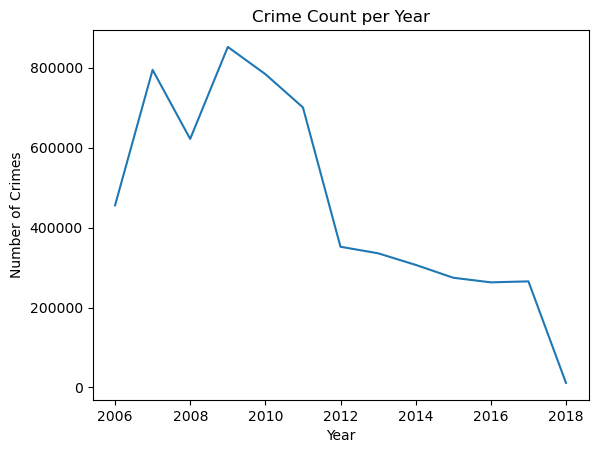

In [36]:
plt.plot(df_final.resample('Y').size())
plt.title('Crime Count per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

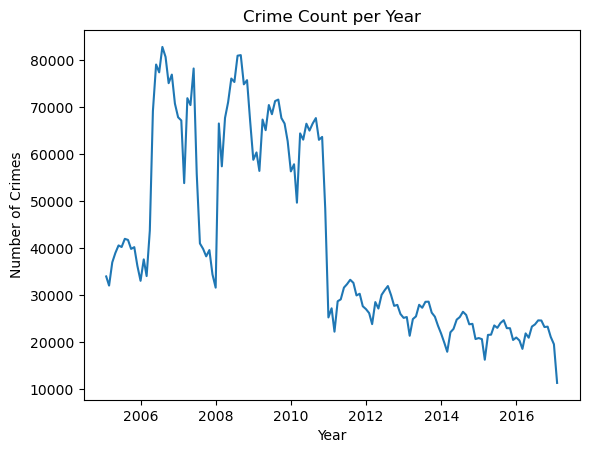

In [37]:
plt.plot(df_final.resample('M').size())
plt.title('Crime Count per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

In [38]:
# Prepare the data

In [39]:
df_final.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False


In [40]:
df_prophet=pd.DataFrame(df_final.resample('M').size().reset_index())

In [41]:
df_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [44]:
# Rename cols
df_prophet.columns=['Date','Crime Count']

In [45]:
df_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [46]:
# ds and y

df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [47]:
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [48]:
# Train the model

In [49]:
m=Prophet()
m.fit(df_prophet)

20:55:43 - cmdstanpy - INFO - Chain [1] start processing
20:55:44 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
# Make the predictions

In [51]:
pred=m.make_future_dataframe(periods=24, freq='M')
forecast = m.predict(pred)

In [52]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60452.847000,38257.816918,72463.387120,60452.847000,60452.847000,-4771.934632,-4771.934632,-4771.934632,-4771.934632,-4771.934632,-4771.934632,0.0,0.0,0.0,55680.912368
1,2005-02-28,60320.438089,34760.459175,67163.997637,60320.438089,60320.438089,-9504.535315,-9504.535315,-9504.535315,-9504.535315,-9504.535315,-9504.535315,0.0,0.0,0.0,50815.902774
2,2005-03-31,60173.842508,41988.351652,75939.252628,60173.842508,60173.842508,-1228.747743,-1228.747743,-1228.747743,-1228.747743,-1228.747743,-1228.747743,0.0,0.0,0.0,58945.094766
3,2005-04-30,60031.975818,45222.409767,77865.898107,60031.975818,60031.975818,1185.700886,1185.700886,1185.700886,1185.700886,1185.700886,1185.700886,0.0,0.0,0.0,61217.676703
4,2005-05-31,59885.380238,48532.503472,81255.712169,59885.380238,59885.380238,5503.431736,5503.431736,5503.431736,5503.431736,5503.431736,5503.431736,0.0,0.0,0.0,65388.811974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6915.548722,-7920.878600,25611.421399,6563.799685,7279.614547,1833.095605,1833.095605,1833.095605,1833.095605,1833.095605,1833.095605,0.0,0.0,0.0,8748.644327
165,2018-10-31,6510.761247,-7286.506479,26008.871923,6127.960145,6921.570624,2432.982436,2432.982436,2432.982436,2432.982436,2432.982436,2432.982436,0.0,0.0,0.0,8943.743684
166,2018-11-30,6119.031433,-12921.581679,20447.802373,5704.251763,6555.717457,-2052.522482,-2052.522482,-2052.522482,-2052.522482,-2052.522482,-2052.522482,0.0,0.0,0.0,4066.508950
167,2018-12-31,5714.243958,-16482.166912,16502.549522,5266.342891,6174.076618,-6019.009785,-6019.009785,-6019.009785,-6019.009785,-6019.009785,-6019.009785,0.0,0.0,0.0,-304.765827


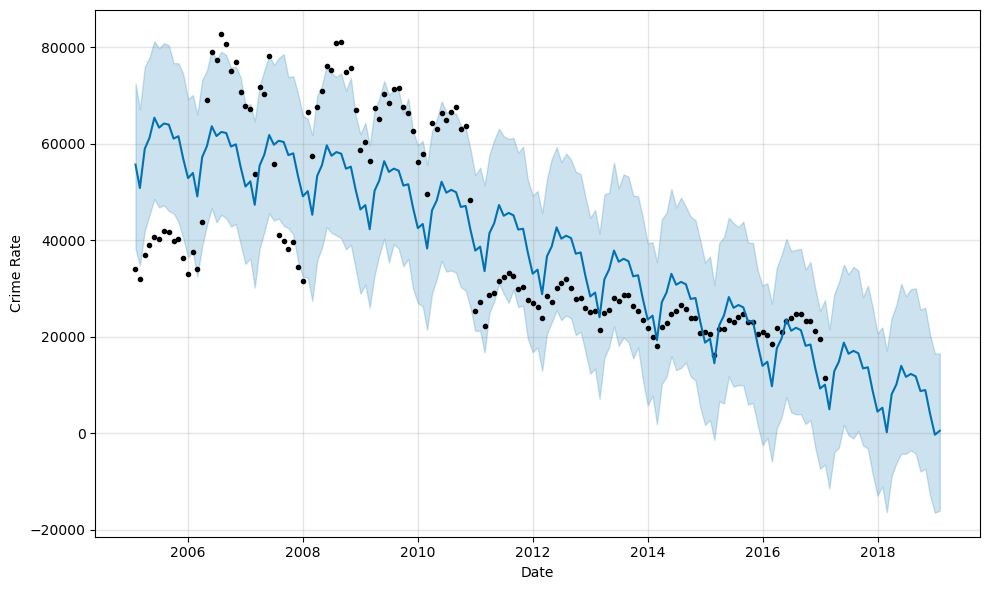

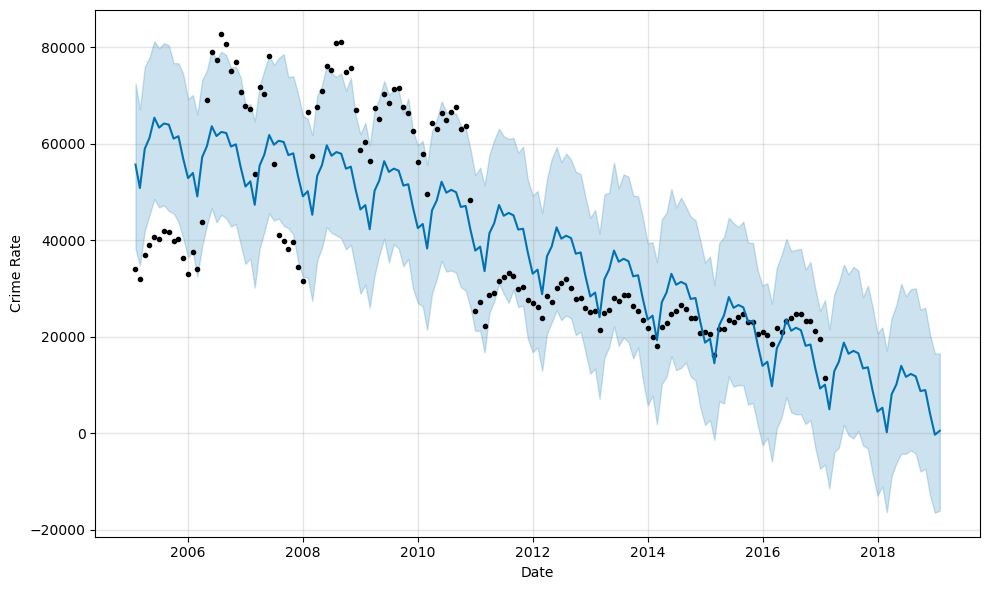

In [53]:
m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

In [54]:
# Save the model

In [55]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)

In [56]:
# Load model

In [57]:
with open('prophet_model.json','r') as fin:
    m1=model_from_json(json.load(fin))

In [58]:
x = int(input("enter number of months to forecast: "))

enter number of months to forecast: 24


In [59]:
pred=m.make_future_dataframe(periods=x, freq='M')
forecast = m.predict(pred)

In [60]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60452.847000,39308.897489,72702.603763,60452.847000,60452.847000,-4771.934632,-4771.934632,-4771.934632,-4771.934632,-4771.934632,-4771.934632,0.0,0.0,0.0,55680.912368
1,2005-02-28,60320.438089,33100.090184,67094.437999,60320.438089,60320.438089,-9504.535315,-9504.535315,-9504.535315,-9504.535315,-9504.535315,-9504.535315,0.0,0.0,0.0,50815.902774
2,2005-03-31,60173.842508,42088.515264,75773.762121,60173.842508,60173.842508,-1228.747743,-1228.747743,-1228.747743,-1228.747743,-1228.747743,-1228.747743,0.0,0.0,0.0,58945.094766
3,2005-04-30,60031.975818,44773.501316,78494.052849,60031.975818,60031.975818,1185.700886,1185.700886,1185.700886,1185.700886,1185.700886,1185.700886,0.0,0.0,0.0,61217.676703
4,2005-05-31,59885.380238,47897.388411,82553.155859,59885.380238,59885.380238,5503.431736,5503.431736,5503.431736,5503.431736,5503.431736,5503.431736,0.0,0.0,0.0,65388.811974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6915.548722,-7649.219775,25385.052923,6509.657491,7268.657068,1833.095605,1833.095605,1833.095605,1833.095605,1833.095605,1833.095605,0.0,0.0,0.0,8748.644327
165,2018-10-31,6510.761247,-7452.176561,26809.793714,6060.713750,6892.996986,2432.982436,2432.982436,2432.982436,2432.982436,2432.982436,2432.982436,0.0,0.0,0.0,8943.743684
166,2018-11-30,6119.031433,-12567.317460,19662.070477,5628.079130,6524.892383,-2052.522482,-2052.522482,-2052.522482,-2052.522482,-2052.522482,-2052.522482,0.0,0.0,0.0,4066.508950
167,2018-12-31,5714.243958,-17300.899040,16822.361612,5192.791063,6149.482244,-6019.009785,-6019.009785,-6019.009785,-6019.009785,-6019.009785,-6019.009785,0.0,0.0,0.0,-304.765827
